In [1]:
from aemeasure import read_as_pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pcpptc import PolygonInstance, Solution
from pcpptc.plot import setup_plot, plot_polygon_instance, plot_solution
from pcpptc.plot.polgyon_instance import plot_coverage

In [3]:
read_as_pd("./solutions/1.results.json").columns

Index(['instance', 'instance_path', 'runtime', 'timestamp', 'hostname', 'argv',
       'git_revision', 'solver', 'solution', 'i', 'coverage', 'touring_cost',
       'length', 'turn_sum', 'turn_factor'],
      dtype='object')

In [4]:
tables = []
for f in os.listdir("./solutions"):
    if not f.endswith(".results.json"):
        continue
    f = os.path.join("./solutions", f)
    tables.append(read_as_pd(f))

data = pd.concat(tables, ignore_index=True)
data.dropna(inplace=True)

In [8]:
instances = [
    PolygonInstance.from_json(file_path=p) for p in data["instance_path"].unique()
]
instance = instances[0]

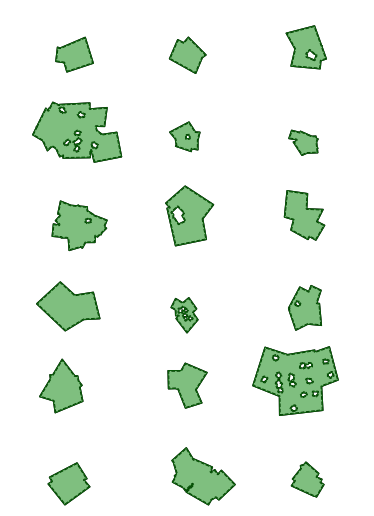

In [47]:
fig, axes = plt.subplots(6, 3, figsize=(5, 7), sharex=True, sharey=True)
plt.tight_layout()
for i in range(0, 18):
    ax = axes[i % 6, i // 6]
    ax.set_aspect("equal", adjustable="box")
    plot_polygon_instance(ax, instances[i], set_limits=False)
    ax.axis("off")
plt.autoscale()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0)
plt.savefig("././output/06_instance_examples.pdf")
plt.show()